In [30]:
from fastai import *
from fastai.vision import *
from fastai.vision.models import resnet50
from fastai.callbacks import CSVLogger

In [2]:
path = '/home/ubuntu/food_101/food-101'

In [4]:
tfms = get_transforms()

In [5]:
import warnings

# source: https://forums.fast.ai/t/warnings-when-trying-to-make-an-imagedatabunch/56323
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [7]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch()
        .normalize(imagenet_stats)
       )

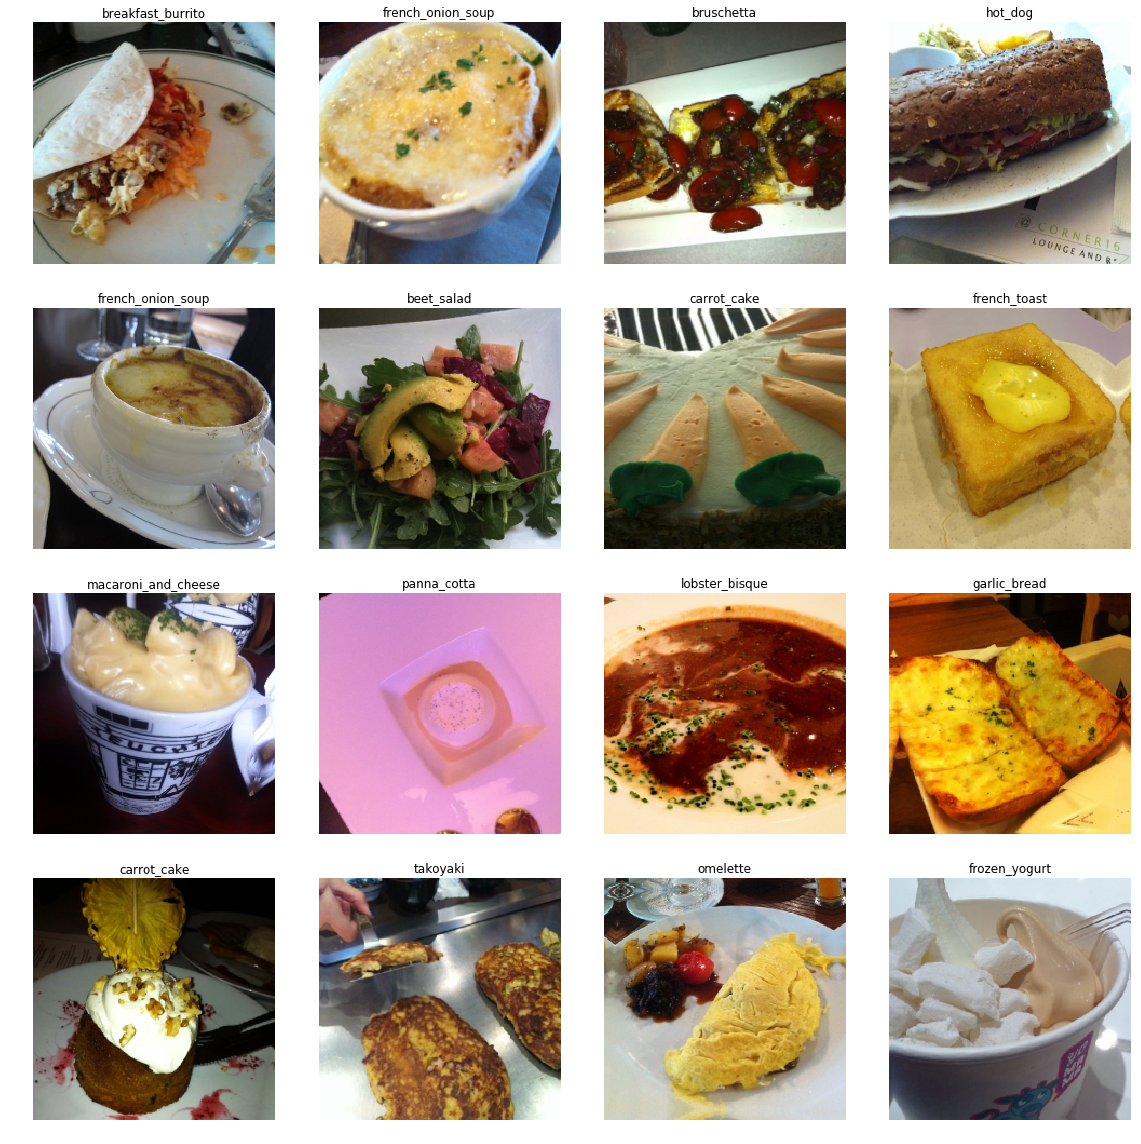

In [7]:
data.show_batch(rows=4)

In [8]:
learner = cnn_learner(data, resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


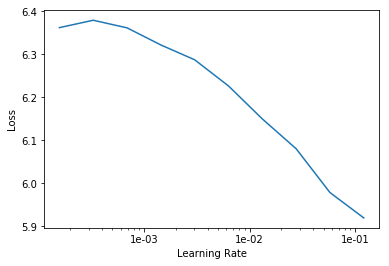

In [35]:
learner.lr_find(num_it=25)
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(10, 1e-2)

In [39]:
learner.save('food_101_v1')

In [25]:
data_large = (ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(tfms=tfms, size=512)
        .databunch(bs=16)
        .normalize(imagenet_stats)
       )

In [31]:
learner = cnn_learner(data_large, resnet50, metrics=accuracy, callback_fns=[CSVLogger])
learner.load('food_101_v1');

In [ ]:
learner.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.294369,0.883271,0.761980,52:22
1,1.991288,6.223394,0.624604,52:15
2,2.401469,9.945260,0.526188,52:04
3,2.216745,13.455498,0.482525,51:48
4,2.234808,4.714203,0.539158,51:34


In [ ]:
learner.save('food_101_v2')